# Airfoil Self-Noise Data Set
#### Download: Data Folder, Data Set Description

#### Abstract:
NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

##### Data Set Characteristics :   -    Multivariate
##### Number of Instances : -  1503
##### Area : -  Physical
##### Attribute Characteristics : - Real
##### Number of Attributes : - 6
##### Date Donated : - 2014-03-04
##### Associated Tasks : - Regression
##### Missing Values? : - N/A
##### Number of Web Hits : - 190156


# Source:

#### Provide the names, email addresses, institutions, and other contact information of the donors and creators of the data set.
#### Donor:
Dr Roberto Lopez
robertolopez '@' intelnics.com
Intelnics

#### Creators:
Thomas F. Brooks, D. Stuart Pope and Michael A. Marcolini
NASA


#### Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


#### Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

#### The only output is:
6. Scaled sound pressure level, in decibels.


#### Relevant Papers:

T.F. Brooks, D.S. Pope, and A.M. Marcolini.
Airfoil self-noise and prediction.
Technical report, NASA RP-1218, July 1989.

K. Lau.
A neural networks approach for aerofoil noise prediction.
Masterâ€™s thesis, Department of Aeronautics.
Imperial College of Science, Technology and Medicine (London, United Kingdom), 2006.

R. Lopez.
Neural Networks for Variational Problems in Engineering.
PhD Thesis, Technical University of Catalonia, 2008.


# Note - 
##### Here My main Focus is to implement the various algorithms and check the accuracy score and RUC score. and how to implement a machine learning project end to end locally(using flask)
##### We are Not focusing on EDA and Feature engineering much in this case

# MultiVariable Regression Problem statement

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None) # To display all the Columns of dataset

In [7]:
df = pd.read_csv('airfoil_self_noise.dat',sep = '\t')

In [8]:
df.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


Here No columns Name First we need to set the columns name as given in Dataset info

In [9]:
df = df = pd.read_csv('airfoil_self_noise.dat',sep = '\t',header=None)
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [10]:
df.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side disp thick","Scaled sound pressure level"]

In [11]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [12]:
df.shape

(1503, 6)

# Exploratory Data Analysis and Feature Engineering

In [13]:
# Finding missing values in all columns
df.isnull().sum()

Frequency                      0
Angle of attack                0
Chord length                   0
Free-stream velocity           0
Suction side disp thick        0
Scaled sound pressure level    0
dtype: int64

Here we do not have any missing value

In [14]:
# Finding information about dataset and dataset columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Frequency                    1503 non-null   int64  
 1   Angle of attack              1503 non-null   float64
 2   Chord length                 1503 non-null   float64
 3   Free-stream velocity         1503 non-null   float64
 4   Suction side disp thick      1503 non-null   float64
 5   Scaled sound pressure level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


Here we have only Numerical features , we do not have categorical features and Temporal features

In [15]:
# Numerical_features
numerical_features = df.iloc[:,:-1].columns
numerical_features

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side disp thick'],
      dtype='object')

In [16]:
# Descrete Features
for feature in numerical_features:
    print(feature,"has",len(df[feature].unique()),"unique Categories")

Frequency has 21 unique Categories
Angle of attack has 27 unique Categories
Chord length has 6 unique Categories
Free-stream velocity has 4 unique Categories
Suction side disp thick has 105 unique Categories


##### Here we can see that we have all the input features are descrete 

In [17]:
descrete_features = numerical_features
descrete_features

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side disp thick'],
      dtype='object')

In [18]:
# Showing the unique categories of descrete features
for feature in descrete_features:
    print(feature,"unique Categories :\n",df[feature].unique(),"\n")

Frequency unique Categories :
 [  800  1000  1250  1600  2000  2500  3150  4000  5000  6300  8000 10000
 12500 16000   500   630   200   250   315   400 20000] 

Angle of attack unique Categories :
 [ 0.   1.5  3.   4.   2.   5.3  7.3  2.7  5.4  7.2  9.9 12.6  4.2  8.4
 11.2 15.4 19.7  4.8  9.5 12.7 17.4 22.2  3.3  6.7  8.9 12.3 15.6] 

Chord length unique Categories :
 [0.3048 0.2286 0.1524 0.0508 0.0254 0.1016] 

Free-stream velocity unique Categories :
 [71.3 55.5 39.6 31.7] 

Suction side disp thick unique Categories :
 [0.00266337 0.00283081 0.00310138 0.00331266 0.00336729 0.00392107
 0.00425727 0.00452492 0.00495741 0.00529514 0.00497773 0.00579636
 0.00214345 0.00229336 0.00253511 0.0027238  0.00293031 0.00313525
 0.00346574 0.00372371 0.00400603 0.0042862  0.00473801 0.00509068
 0.0051942  0.00614329 0.0104404  0.0111706  0.0123481  0.0132672
 0.0015988  0.00172668 0.00193287 0.00209405 0.00243851 0.00294804
 0.00401199 0.00433288 0.00485029 0.00525474 0.00752039 0.00909175
 0

### Data Visualization

In [19]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side disp thick', 'Scaled sound pressure level'],
      dtype='object')

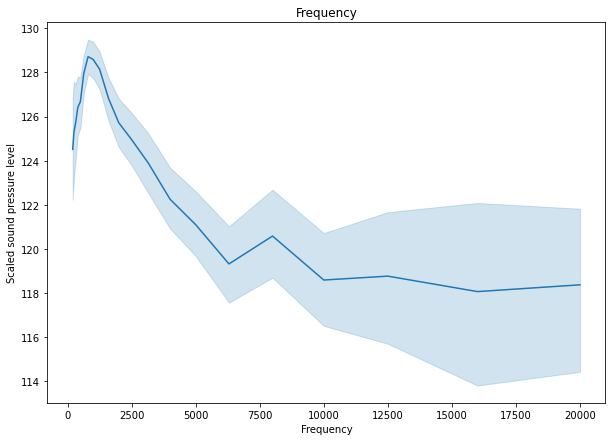

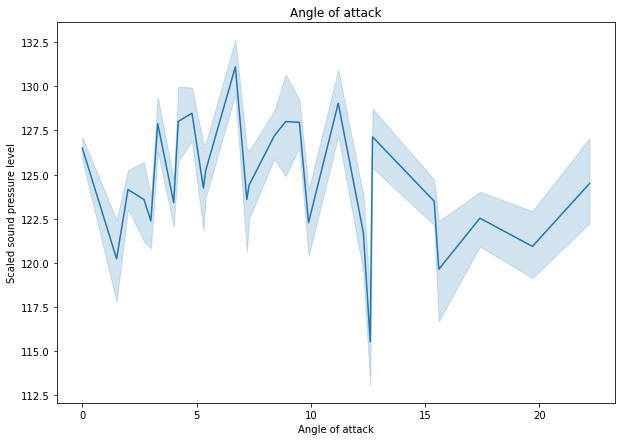

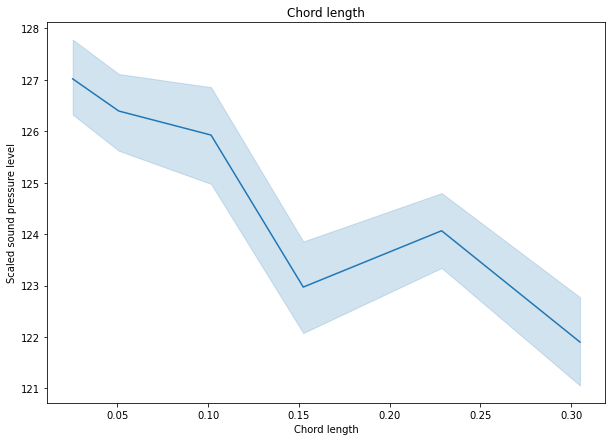

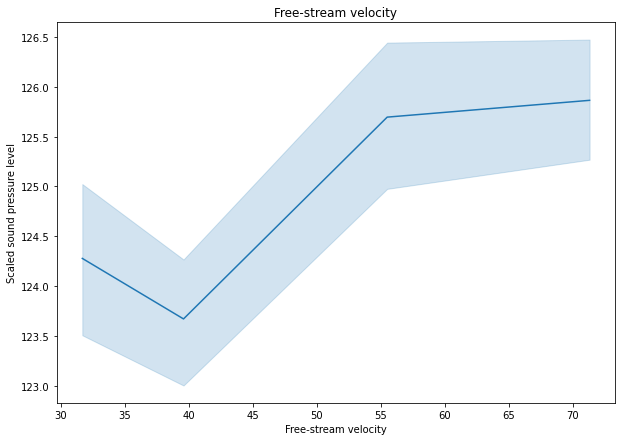

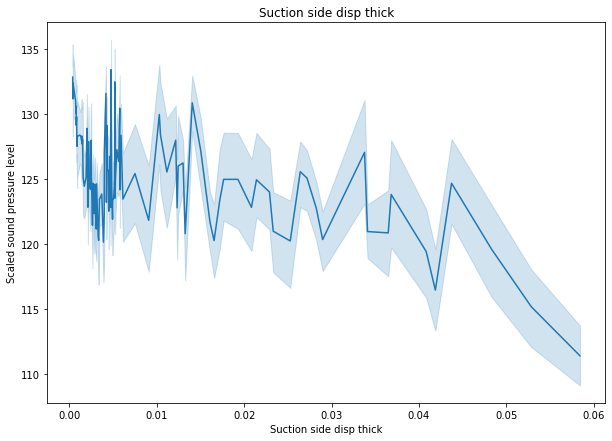

In [20]:
# Line Plots
for features in descrete_features:
    plt.figure(figsize=(10,7))
    plt.title(features)
    sns.lineplot(x=df[features],y = df['Scaled sound pressure level'])

## Observation - :
- As Frequency is increasing our sound pressure level is decreasing and Here we have a strong relationship between Frequency and output feature.
- For Angle of attack we can see that zig-zag curve so week relationship with output feature.
- As Chord length is increasing our sound pressure level is decreasing and Here we have a strong relationship between Frequency and output feature.
- As Free-stream velocity is increasing our sound pressure level is also inreasing and Here we have a strong relationship between Frequency and output feature.
- As Suction side disp thick is increasing our sound pressure level is decreasing and Here we have a  relationship between Frequency and output feature.

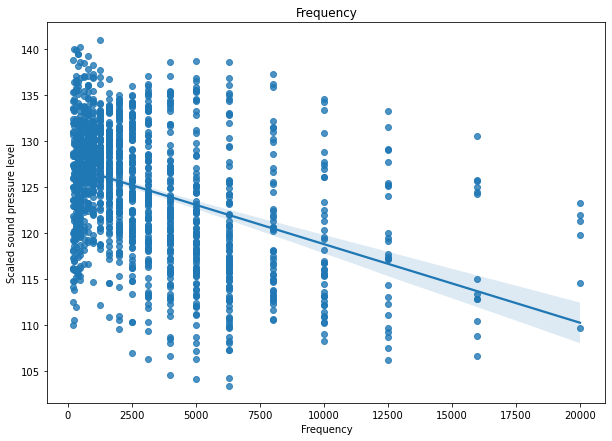

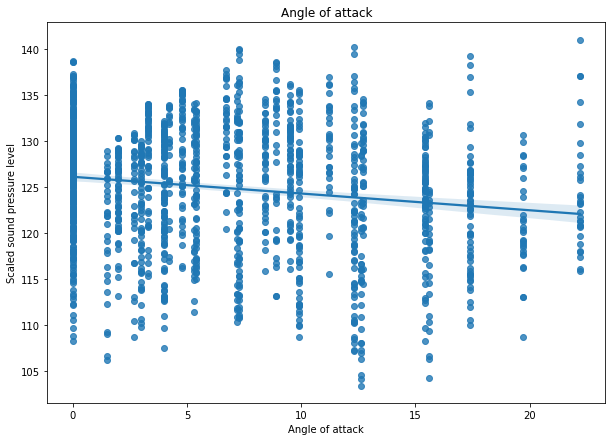

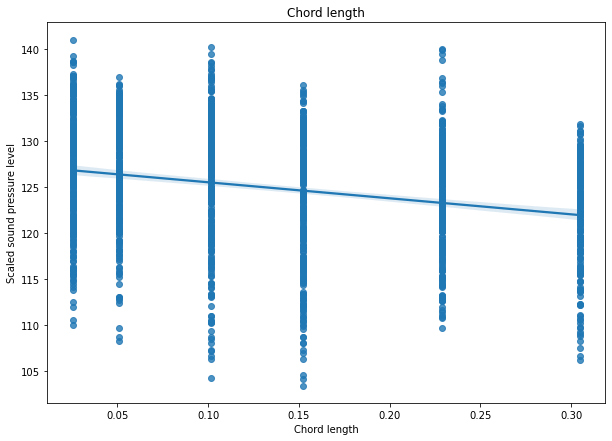

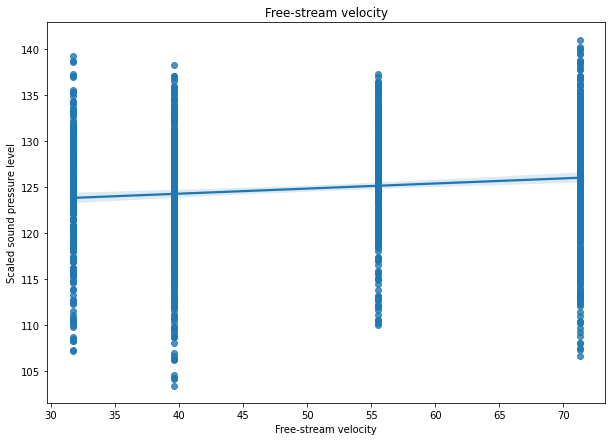

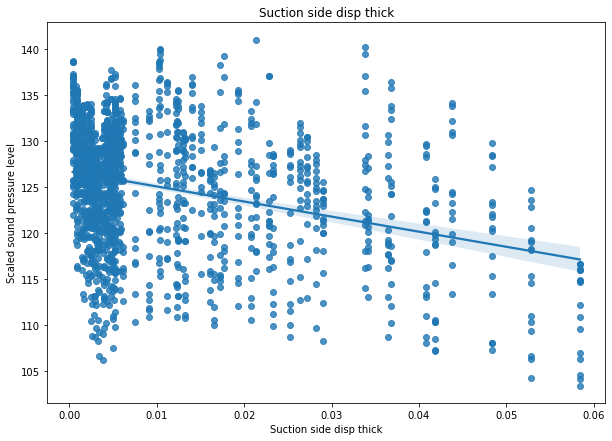

In [21]:
# Scatter Plots (with Regression line plot)
for features in descrete_features:
    plt.figure(figsize=(10,7))
    plt.title(features)
    sns.regplot(x=df[features],y = df['Scaled sound pressure level'])

C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Scaled sound pressure level'>

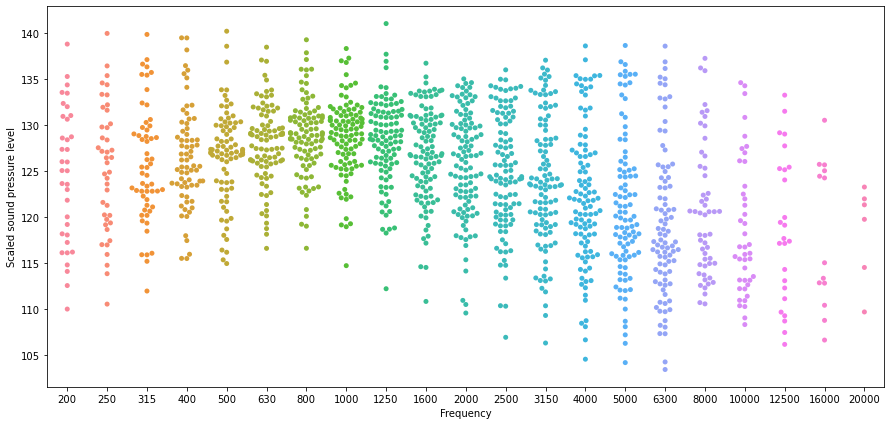

In [22]:
# Swarm Plots 
plt.figure(figsize=(15,7))
sns.swarmplot(x=df['Frequency'],y = df['Scaled sound pressure level'])

C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rtiwa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Angle of attack', ylabel='Scaled sound pressure level'>

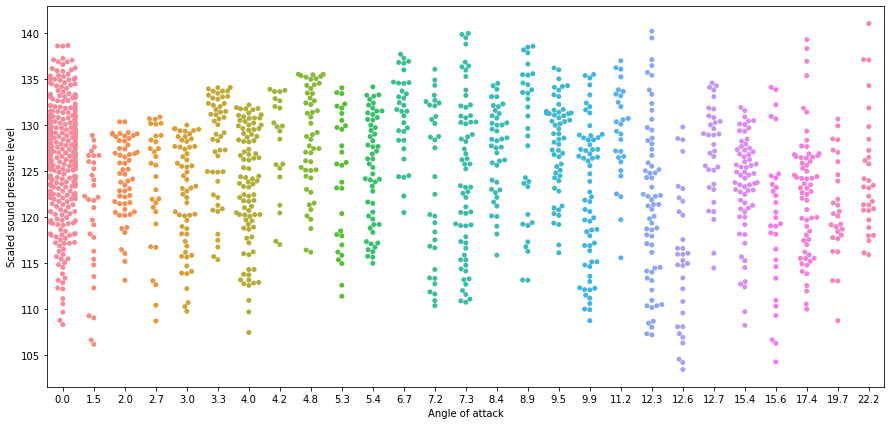

In [23]:
plt.figure(figsize=(15,7))
sns.swarmplot(x=df['Angle of attack'],y = df['Scaled sound pressure level'])

<AxesSubplot:xlabel='Chord length', ylabel='Scaled sound pressure level'>

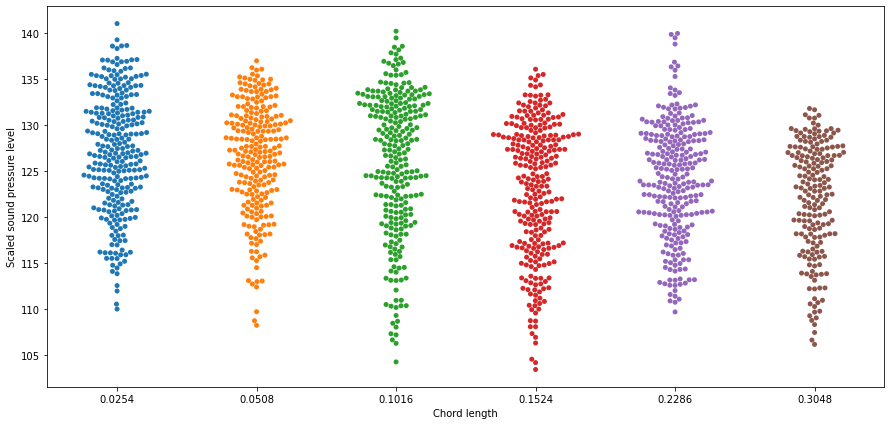

In [24]:
plt.figure(figsize=(15,7))
sns.swarmplot(x=df['Chord length'],y = df['Scaled sound pressure level'])

<AxesSubplot:xlabel='Free-stream velocity', ylabel='Scaled sound pressure level'>

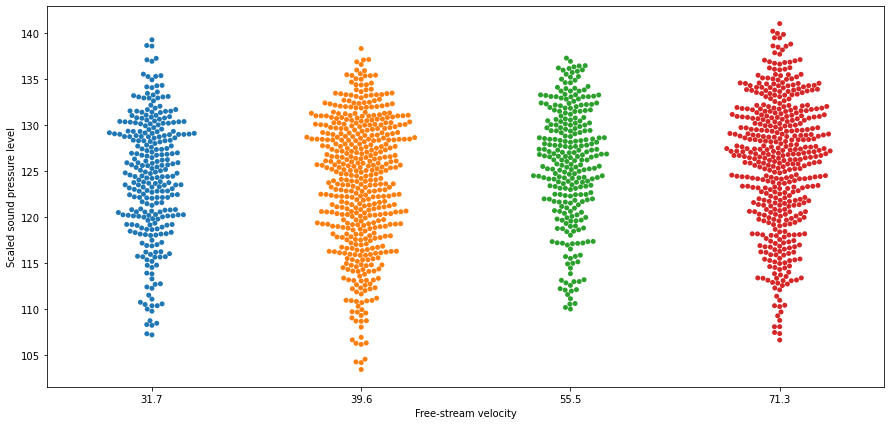

In [25]:
plt.figure(figsize=(15,7))
sns.swarmplot(x=df['Free-stream velocity'],y = df['Scaled sound pressure level'])

<AxesSubplot:xlabel='Suction side disp thick', ylabel='Scaled sound pressure level'>

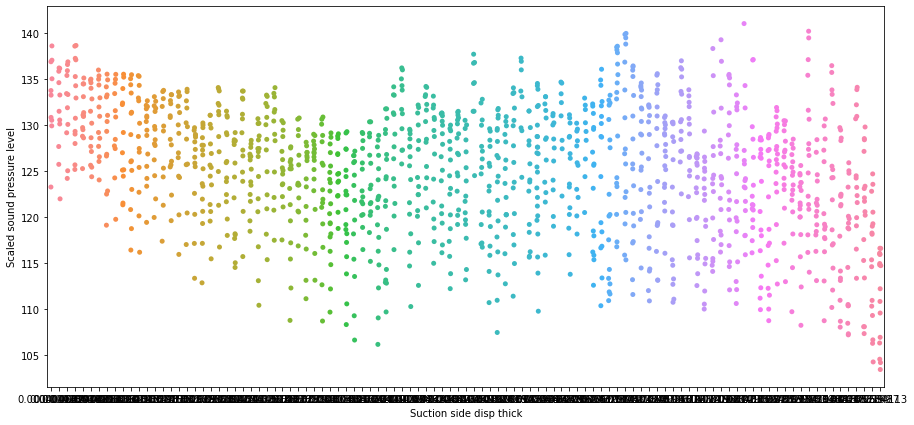

In [26]:
plt.figure(figsize=(15,7))
sns.stripplot(x=df['Suction side disp thick'],y = df['Scaled sound pressure level'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

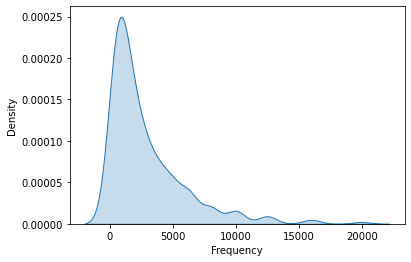

In [27]:
# Distributions of Input features
sns.kdeplot(df['Frequency'],shade = True)

<AxesSubplot:xlabel='Angle of attack', ylabel='Density'>

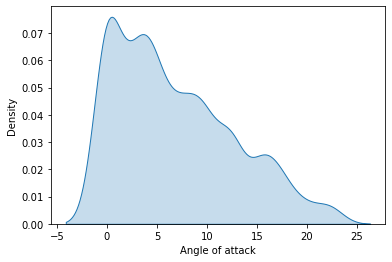

In [28]:
sns.kdeplot(df['Angle of attack'],shade = True)

<AxesSubplot:xlabel='Chord length', ylabel='Density'>

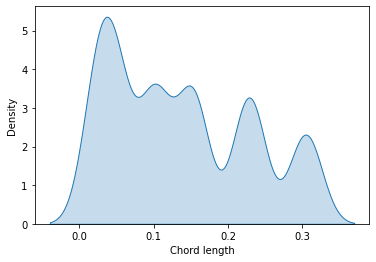

In [29]:
sns.kdeplot(df['Chord length'],shade = True)

<AxesSubplot:xlabel='Free-stream velocity', ylabel='Density'>

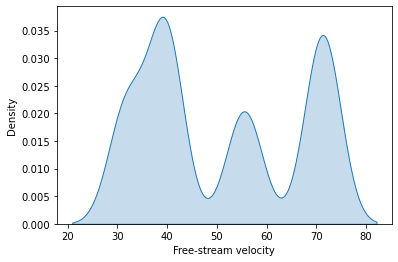

In [30]:
sns.kdeplot(df['Free-stream velocity'],shade = True)

<AxesSubplot:xlabel='Suction side disp thick', ylabel='Density'>

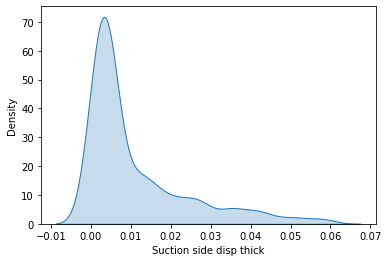

In [31]:
sns.kdeplot(df['Suction side disp thick'],shade = True)

<AxesSubplot:xlabel='Scaled sound pressure level', ylabel='Density'>

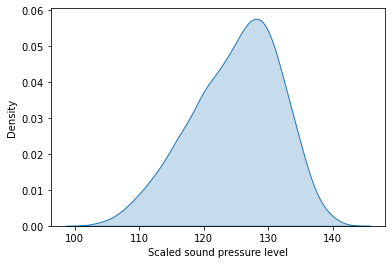

In [32]:
sns.kdeplot(df['Scaled sound pressure level'],shade = True)

<AxesSubplot:>

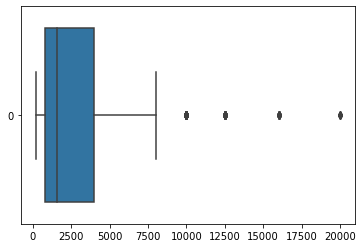

In [33]:
# BOX Plot (To see the outliers)
sns.boxplot(data = df['Frequency'],orient = 'h')

<AxesSubplot:>

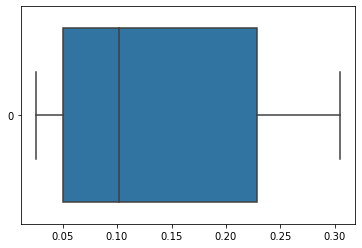

In [34]:
sns.boxplot(data = df['Chord length'],orient = 'h')

<AxesSubplot:>

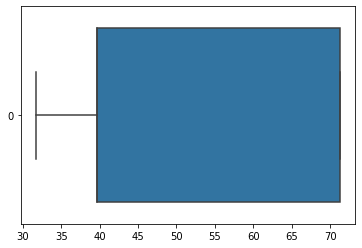

In [35]:
sns.boxplot(data = df['Free-stream velocity'],orient = 'h')

<AxesSubplot:>

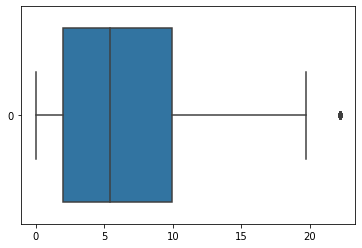

In [36]:
sns.boxplot(data = df['Angle of attack'],orient = 'h')

<AxesSubplot:>

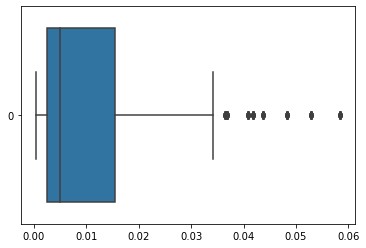

In [37]:
sns.boxplot(data = df['Suction side disp thick'],orient = 'h')

<AxesSubplot:>

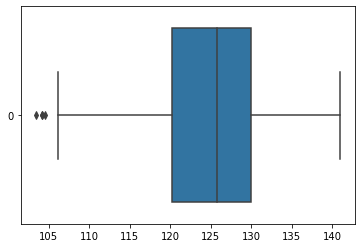

In [38]:
sns.boxplot(data = df['Scaled sound pressure level'],orient = 'h')

# Dividing Data in to Train(70%) and Test(30%)

In [39]:
# input variables
x = df.iloc[:,:-1]
# Output variables
y = df.iloc[:,-1]

print("x=",x.columns,"\n")
print("y=",y.name)

x= Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side disp thick'],
      dtype='object') 

y= Scaled sound pressure level


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

# Applying Different - Different Regression Algorithms

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 3.6747310654156204
Mean_Squared_error : 22.39594664381414
Root_Mean_Squared_error : 4.732435593202948
r2_score : 52.37 %


In [42]:
y_pred

array([126.46274574, 120.47595194, 117.75855607, 129.1302893 ,
       124.78612694, 129.17418953, 120.2561083 , 133.30641759,
       119.37807655, 126.10083781, 125.0349905 , 126.96955201,
       132.49347482, 121.02713693, 123.7448257 , 119.04999283,
       128.7846024 , 123.20317239, 117.92428406, 125.07955073,
       122.22646665, 127.36695301, 127.37487951, 126.08211442,
       128.98413633, 122.65895214, 116.79252578, 126.84533737,
       128.08454543, 126.14137454, 129.75388362, 124.11755832,
       109.262863  , 127.61480252, 127.91164858, 129.77440024,
       119.9497899 , 104.15794221, 126.89911793, 129.72858658,
       131.99044372, 122.86400594, 124.94767529, 118.92143939,
       116.28761659, 131.4954033 , 126.70538095, 130.05303511,
       131.75762068, 123.25673476, 120.41065794, 124.39650906,
       118.72993439, 124.64234753, 122.22705181, 123.68700225,
       114.01431312, 125.63851123, 124.36443262, 120.15055538,
       125.32278482, 125.33694564, 127.7717905 , 130.67

In [43]:
# Let see output for 1 input value or 2 input value?
df.head(2)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [44]:
input = df.head(2).iloc[:,:-1]
input

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663


In [45]:
output = regressor.predict(input)
output

array([127.42193302, 127.16935189])

In [46]:
# Let see the difference between Actual and predicted values for these inputs
pred_df=pd.DataFrame({'Actual Value':df.head(2).iloc[:,-1],'Predicted Value':output,'Difference':df.head(2).iloc[:,-1]-output})
pred_df

,Actual Value,Predicted Value,Difference
0,126.201,127.421933,-1.220933
1,125.201,127.169352,-1.968352


In [47]:
# Let see the difference between Actual and predicted values for Test dataset
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
968,130.787,126.462746,4.324254
9,119.541,120.475952,-0.934952
1468,110.317,117.758556,-7.441556
1150,117.396,129.130289,-11.734289
880,127.625,124.786127,2.838873
...,...,...,...
546,134.111,130.080942,4.030058
1331,115.321,118.741289,-3.420289
1334,133.012,129.286609,3.725391
458,128.647,131.694992,-3.047992


Text(0, 0.5, 'Predicted')

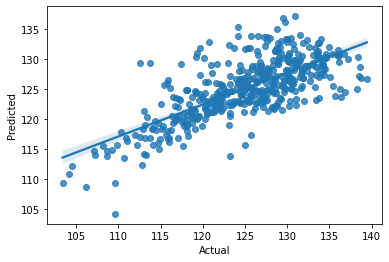

In [48]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 3.8161222915925292
Mean_Squared_error : 23.37615416606201
Root_Mean_Squared_error : 4.834889260992646
r2_score : 50.28 %


Text(0, 0.5, 'Predicted')

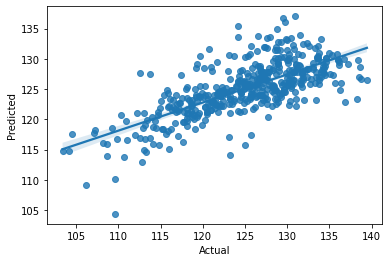

In [50]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 4.536516104573356
Mean_Squared_error : 32.19689536169003
Root_Mean_Squared_error : 5.674230816744243
r2_score : 31.52 %


Text(0, 0.5, 'Predicted')

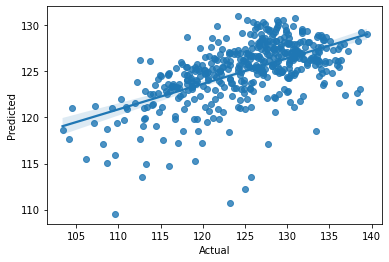

In [52]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## ElasticNet

In [53]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 4.5367810926241
Mean_Squared_error : 32.11421655792734
Root_Mean_Squared_error : 5.666940670055347
r2_score : 31.70 %


Text(0, 0.5, 'Predicted')

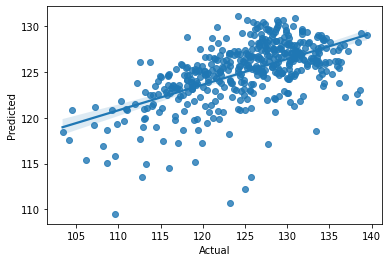

In [54]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### KNN Regressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor 
regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 4.719142793791574
Mean_Squared_error : 37.145828333037706
Root_Mean_Squared_error : 6.094737757528022
r2_score : 20.99 %


Text(0, 0.5, 'Predicted')

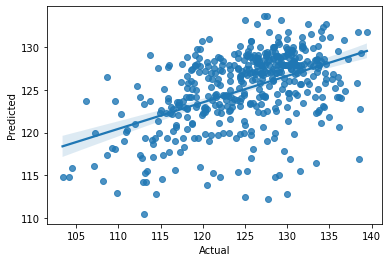

In [56]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Support Vector Regressor

In [57]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 4.669760440658052
Mean_Squared_error : 36.686673925006446
Root_Mean_Squared_error : 6.056952527881199
r2_score : 21.97 %


Text(0, 0.5, 'Predicted')

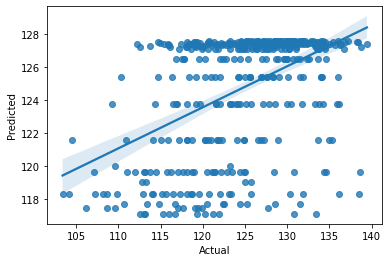

In [58]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 1.8681064301552106
Mean_Squared_error : 6.383868722838136
Root_Mean_Squared_error : 2.5266318930224356
r2_score : 86.42 %


Text(0, 0.5, 'Predicted')

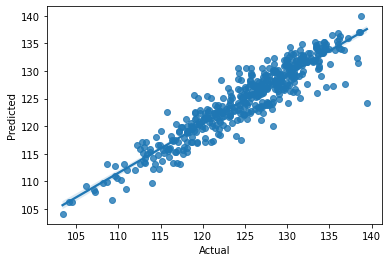

In [60]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [61]:
# Let see the difference between Actual and predicted values for Test dataset
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
968,130.787,129.867,0.920
9,119.541,120.786,-1.245
1468,110.317,110.264,0.053
1150,117.396,119.806,-2.410
880,127.625,129.285,-1.660
...,...,...,...
546,134.111,133.201,0.910
1331,115.321,115.659,-0.338
1334,133.012,131.971,1.041
458,128.647,128.244,0.403


In [62]:
df.head(2)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [63]:
# Let see the difference between Actual and predicted values for these inputs
pred_df=pd.DataFrame({'Actual Value':df.head(2).iloc[:,-1],'Predicted Value':output,'Difference':df.head(2).iloc[:,-1]-output})
pred_df

,Actual Value,Predicted Value,Difference
0,126.201,127.421933,-1.220933
1,125.201,127.169352,-1.968352


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)


# Accuraccy 
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

print("Mean_absolute_error : {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred)))
print("Root_Mean_Squared_error : {}".format(mean_squared_error(y_test,y_pred,squared=False)))
print("r2_score : {0:.2f} %".format(r2_score(y_test,y_pred)*100))

Mean_absolute_error : 1.3075035476718442
Mean_Squared_error : 3.143062896058997
Root_Mean_Squared_error : 1.772868550135344
r2_score : 93.31 %


Text(0, 0.5, 'Predicted')

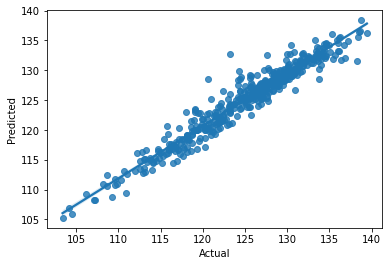

In [65]:
# Visualizing the result
sns.regplot(x = y_test,y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [66]:
# Let see the difference between Actual and predicted values for Test dataset
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
968,130.787,132.98711,-2.20011
9,119.541,118.12967,1.41133
1468,110.317,111.67446,-1.35746
1150,117.396,117.83244,-0.43644
880,127.625,125.70539,1.91961
...,...,...,...
546,134.111,132.34333,1.76767
1331,115.321,115.64585,-0.32485
1334,133.012,131.92839,1.08361
458,128.647,129.28941,-0.64241


In [67]:
df.head(2)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [68]:
# Let see the difference between Actual and predicted values for these inputs
pred_df=pd.DataFrame({'Actual Value':df.head(2).iloc[:,-1],'Predicted Value':output,'Difference':df.head(2).iloc[:,-1]-output})
pred_df

,Actual Value,Predicted Value,Difference
0,126.201,127.421933,-1.220933
1,125.201,127.169352,-1.968352


## Save the model in Pickle File -
- Save the model in serialized format(we can use also use - sav format) , h5 format for deep learning

In [90]:
import pickle
pickle.dump(rf_regressor,open('model.pkl','wb'))  # wb - write byte mode

## Load the Pickle file

In [91]:
pickle_model = pickle.load(open('model.pkl','rb'))
pickle_model.predict(x_test)

array([132.98711, 118.12967, 111.67446, 117.83244, 125.70539, 123.0443 ,
       119.17921, 129.81347, 116.4531 , 125.47102, 125.03293, 131.6264 ,
       129.99716, 118.0787 , 126.76983, 115.06974, 127.75467, 132.32289,
       117.09498, 117.05173, 121.07652, 130.56464, 129.3362 , 128.56984,
       130.86375, 121.23895, 116.62434, 138.36989, 129.38681, 129.38384,
       127.41984, 121.72006, 105.24957, 127.0652 , 132.67473, 130.92411,
       116.80864, 111.75192, 127.05996, 126.89984, 132.2545 , 123.81204,
       131.53583, 120.98713, 112.57445, 133.19884, 126.75664, 128.96324,
       129.26982, 128.85365, 124.40332, 125.71504, 120.90583, 127.18308,
       121.01935, 121.44149, 116.55708, 129.72504, 121.1537 , 119.91683,
       126.45774, 132.33154, 127.28406, 133.16796, 125.33463, 125.37923,
       126.59774, 130.203  , 131.30434, 115.22478, 127.21165, 126.73581,
       125.25183, 130.47577, 127.37695, 124.12605, 123.98464, 125.87254,
       132.94577, 129.6821 , 130.11264, 129.17122, 

## Let us see output for single input

In [92]:
x_test

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side disp thick
968,10000,0.0,0.0254,71.3,0.000401
9,6300,0.0,0.3048,71.3,0.002663
1468,2500,12.3,0.1016,31.7,0.041876
1150,400,17.4,0.0254,71.3,0.016104
880,2500,15.4,0.0508,71.3,0.026427
...,...,...,...,...,...
546,1250,5.4,0.1524,71.3,0.004012
1331,10000,3.3,0.1016,39.6,0.002451
1334,1000,3.3,0.1016,31.7,0.002514
458,2000,0.0,0.1524,71.3,0.001599


In [93]:
y_test

968     130.787
9       119.541
1468    110.317
1150    117.396
880     127.625
         ...   
546     134.111
1331    115.321
1334    133.012
458     128.647
1255    127.920
Name: Scaled sound pressure level, Length: 451, dtype: float64

In [94]:
x_test.loc[968]

Frequency                  10000.000000
Angle of attack                0.000000
Chord length                   0.025400
Free-stream velocity          71.300000
Suction side disp thick        0.000401
Name: 968, dtype: float64

In [95]:
y_test.loc[968] # - actual output

130.787

In [96]:
dict_test ={
'Frequency': 10000.000000,
'Angle of attack' : 0.000000,
'Chord length' : 0.025400,
'Free-stream velocity': 71.300000,
'Suction side disp thick' : 0.000401
}

In [97]:
single_input = [list(dict_test.values())] # because model takes 2D Array as input
single_input

[[10000.0, 0.0, 0.0254, 71.3, 0.000401]]

In [101]:
pickle_model.predict(single_input) # Predicted output 

array([132.98711])

In [102]:
pickle_model.predict(single_input)[0]

132.98711000000011